# Build  spectra for AuxTel

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : March 30th 2021
- creation update : March 31th 2021
- version v0


This notebook is to help for finding the position of order 0

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re

plt.rcParams["figure.figsize"] = (12,12)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
from iminuit import Minuit
import iminuit

In [3]:
iminuit.__version__

'2.2.0'

In [4]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.images import *
from scipy import ndimage, misc

In [5]:
from scipy.stats import kurtosis,skew
from scipy.stats import kurtosistest,skewtest,normaltest

# Function

In [6]:
def file_target(filename):
    m=re.findall('^Cor_ronchi170lpmm_.*_(.*)_[0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*[.]fits$',filename)
    if len(m)>0:
        return m
    elif re.search('NGC4755',filename):
        return ['NGC4755']
    else:
        return []

# Logbook for file selection

In [7]:
filename_logbook='logbooks/auxtelronchi170lpmmlogbook_2021_v0.0.csv'

In [8]:
df=pd.read_csv(filename_logbook,index_col=0)

In [9]:
pd.set_option('display.max_rows', None)

In [10]:
df

,index,date,path,file,num,object,filter,disperser,airmass,exposure,...,temperature,humidity,windspd,Obj-posXpix,Obj-posYpix,Dx,Dy,skip,run,quality
0,0,2021-03-12T01:19:36.315,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_188...,188,HD75519,RG610,ronchi170lpmm,1.033813,5.0,...,11.7,50.0,0.9,NaN,NaN,NaN,NaN,,NaN,NaN
1,1,2021-03-12T01:20:18.220,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_189...,189,HD75519,RG610,ronchi170lpmm,1.033311,5.0,...,11.7,55.0,0.8,NaN,NaN,NaN,NaN,,NaN,NaN
2,2,2021-03-12T01:20:33.072,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_190...,190,HD75519,RG610,ronchi170lpmm,1.033136,5.0,...,11.7,55.0,0.8,NaN,NaN,NaN,NaN,,NaN,NaN
3,3,2021-03-12T01:52:19.566,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_200...,200,HD75519,RG610,ronchi170lpmm,1.017516,5.0,...,11.6,49.0,0.3,NaN,NaN,NaN,NaN,,NaN,NaN
4,4,2021-03-12T01:52:28.549,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_201...,201,HD75519,RG610,ronchi170lpmm,1.017474,5.0,...,11.6,49.0,0.3,NaN,NaN,NaN,NaN,,NaN,NaN
5,5,2021-03-12T01:52:38.095,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_202...,202,HD75519,RG610,ronchi170lpmm,1.017430,5.0,...,11.6,49.0,0.3,NaN,NaN,NaN,NaN,,NaN,NaN
6,6,2021-03-12T01:52:47.124,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_203...,203,HD75519,RG610,ronchi170lpmm,1.017389,5.0,...,11.6,49.0,0.3,NaN,NaN,NaN,NaN,,NaN,NaN
7,7,2021-03-12T02:00:08.356,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_204...,204,HD75519,RG610,ronchi170lpmm,1.015876,5.0,...,11.7,49.0,1.2,NaN,NaN,NaN,NaN,,NaN,NaN
8,8,2021-03-12T02:01:03.092,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_205...,205,HD75519,RG610,ronchi170lpmm,1.015722,5.0,...,11.8,50.0,0.3,NaN,NaN,NaN,NaN,,NaN,NaN
9,9,2021-03-12T02:01:12.571,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_206...,206,HD75519,RG610,ronchi170lpmm,1.015696,5.0,...,11.8,50.0,0.5,NaN,NaN,NaN,NaN,,NaN,NaN


# Selection of input file

In [11]:
myhome=os.getenv("HOME")

In [12]:
#dir_spectra="/Users/dagoret/DATA/AuxTelData2021/holo/FlipCleans"
dir_images=os.path.join(myhome,"DATA/AuxTelData2021/ronchi170lpmm/FlipCleans")

In [13]:
#filename_image="Cor_holo4_003_RG610_HD75519_2021-03-11_296.fits"

In [695]:
filename_image=df['file'][35]
filename_image

'Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_232.fits'

In [696]:
filename_image

'Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_232.fits'

In [697]:
file_target(filename_image)

['HD75519']

In [698]:
filename=os.path.join(dir_images,filename_image)
output_directory="./outputs_ronchi170lpmm/"
guess = [250,2600]
disperser_label = "ronchi170lpmm"
config = "config/auxtel_quicklook.ini"
#config = "config/auxtel.ini"
target = file_target(filename_image)[0]

In [699]:
#spectractor_dir="/Users/dagoret/MacOSX/GitHub/LSST/SpectractorNew/spectractor"

# Configuration of the running mode

In [700]:
parameters.debug=True
parameters.verbose=True
parameters.display=True
parameters.LIVE_FIT=False

In [701]:
#parameters.DISPERSER_DIR = os.path.join(spectractor_dir, "extractor/dispersers/")
#parameters.CONFIG_DIR = os.path.join(spectractor_dir, "../config/")
#parameters.THROUGHPUT_DIR = os.path.join(spectractor_dir, "simulation/CTIOThroughput/")

# Load an image

In [702]:
image=Image(file_name=filename, target_label=target, disperser_label=disperser_label, config=config)

Section: paths
x disperser_dir: extractor/dispersers/	=> parameters.DISPERSER_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/	 <class 'str'>
x throughput_dir: simulation/AuxTelThroughput/	=> parameters.THROUGHPUT_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/simulation/AuxTelThroughput/	 <class 'str'>
Section: instrument
x obs_name: AUXTEL	=> parameters.OBS_NAME: AUXTEL	 <class 'str'>
x obs_altitude: 2.66299616375123	=> parameters.OBS_ALTITUDE: 2.66299616375123	 <class 'float'>
x obs_latitude: -30.2446389756252	=> parameters.OBS_LATITUDE: -30.2446389756252	 <class 'float'>
x obs_diameter: 1.20	=> parameters.OBS_DIAMETER: 1.2 m	 <class 'astropy.units.quantity.Quantity'>
x obs_epoch: J2000.0	=> parameters.OBS_EPOCH: J2000.0	 <class 'str'>
x obs_transmission_systematics: 0.005	=> parameters.OBS_TRANSMISSION_SYSTEMATICS: 0.005	 <class 'float'>
x obs_object_type: STAR	=> paramet

2021-04-18 23:58:16  Image      load_AUXTEL_image    INFO   
	Loading AUXTEL image /Users/dagoret/DATA/AuxTelData2021/ronchi170lpmm/FlipCleans/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_232.fits...
2021-04-18 23:58:16  Image      load_AUXTEL_image    INFO   
	Image loaded
2021-04-18 23:58:16  Image      load_image           INFO   
	Loading disperser ronchi170lpmm...
2021-04-18 23:58:17  Hologram   load_specs           INFO   
	Load disperser ronchi170lpmm:
	from /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/ronchi170lpmm
2021-04-18 23:58:17  Hologram   load_specs           INFO   
	Grating characteristics:
	N = 170.00 +/- 0.10 grooves/mm
	Average tilt of 0.0 degrees
2021-04-18 23:58:21  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.364855849003117 but average of self.read_out_noise is 8.5.
2021-04-18 23:58:21  TelescopeTransmission reset_lambda_rang

## Show relevant parameters

In [703]:
parameters.OBS_NAME

'AUXTEL'

In [704]:
parameters.DISPERSER_DIR

'/Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/'

In [705]:
parameters.DISTANCE2CCD

174.9980010986328

In [706]:
parameters.LAMBDA_MIN 

563

In [707]:
parameters.LAMBDA_MAX 

1095

In [708]:
parameters.LSST_SAVEFIGPATH=True
parameters.LSST_SAVEFIGPATH="figures_ronchi"

In [709]:
image.filter_label

'RG610'

In [710]:
image.header["FILTER"]

'RG610'

In [711]:
#image.header

# Plot image and find the target position

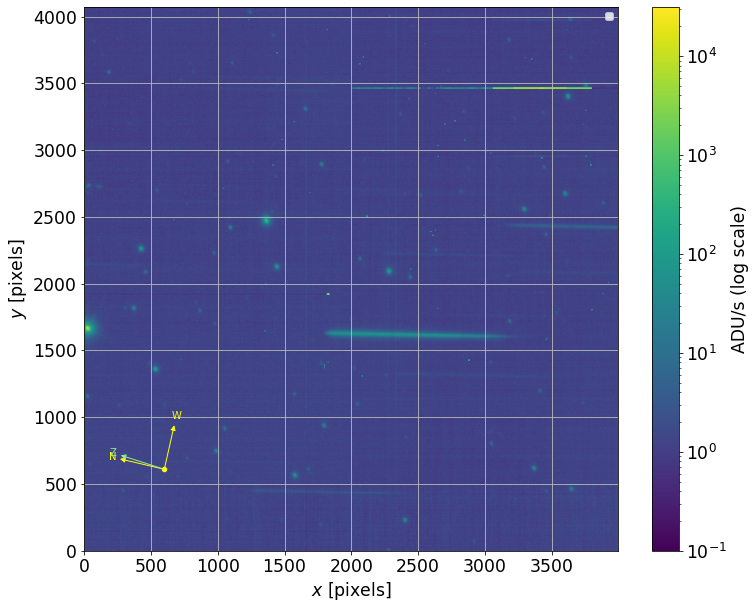

In [712]:
image.plot_image(figsize=(12, 10),scale="log")

In [713]:
filename_image

'Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_232.fits'

In [714]:
guess = [1800, 2500] # filename_image=df['file'][0] , Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_188.fits, moved truncated
guess = [1800, 2500] # filename_image=df['file'][1], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_189.fits, idem
guess = [1800, 2500] # filename_image=df['file'][2], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_190.fits, idem
guess = [2100, 1750] # filename_image=df['file'][3], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_200.fits, horrible
guess = [2100, 1750] # filename_image=df['file'][4], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_201.fits, bad not rec
guess = [2100, 1750] # filename_image=df['file'][5], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_202.fits bad not rec
guess = [2100, 1750] # filename_image=df['file'][6], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_203.fits bad not rec
guess = [200, 1700] # filename_image=df['file'][7], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_204.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][8], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_205.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][9], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_206.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][10], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_207.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][11], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_208.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][12], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_209.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][13], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_210.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][14], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_211.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][15], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_212.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][16], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_213.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][17], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_214.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][18], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_215.fits  Reconstruit 
guess = [100, 1700] # filename_image=df['file'][19], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_216.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][20], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_217.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][21], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_218.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][22], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_219.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][23], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_220.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][24], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_221.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][25], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_222.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][26], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_223.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][27], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_224.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][28], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_225.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][29], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_226.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][30], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_227.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][31], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_228.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][32], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_229.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][33], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_230.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][34], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_231.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][35], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_232.fits  trop au bord pas rec

2021-04-18 23:58:29  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0               c1_0                 c0_1        
    ----------------- -------------------- --------------------
    8.496485245716018 -0.03351217126158822 -0.01820182683086368
2021-04-18 23:58:29  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 4 iterations because the relative change of cost is below ftol=1.25e-05.


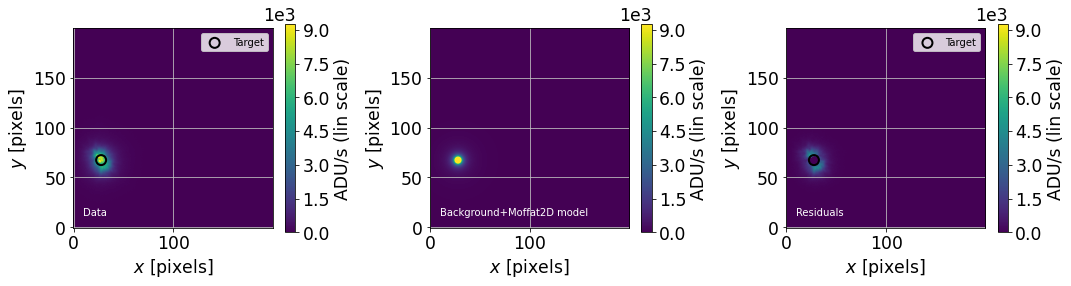

2021-04-18 23:58:30  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 1 iterations because the relative change of cost is below ftol=6.493506493506494e-05.


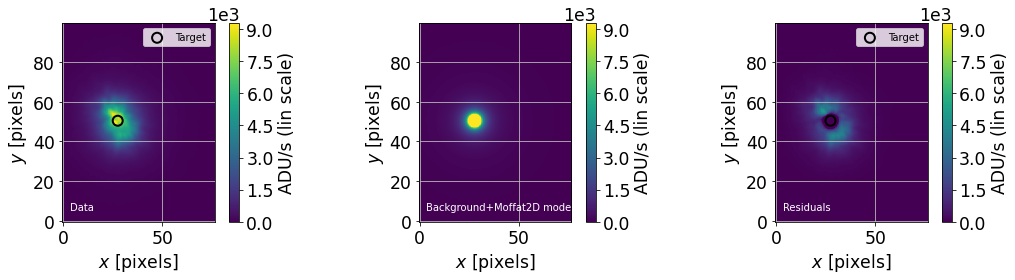

2021-04-18 23:58:31  Image      find_target          INFO   
	X,Y target position in pixels: 27.480,1667.434


In [715]:

parameters.VERBOSE = True
parameters.DEBUG = True
x1, y1 = find_target(image, guess,rotated=False, use_wcs=False)

In [716]:
print(x1,y1)

27.479571832079777 1667.4340384564973


In [717]:
thumbnail=np.copy(image.data[int(y1)-50:int(y1)+50,int(x1)-50:int(x1)+50])
thumbnail_y=thumbnail.sum(axis=1)
thumbnail_x=thumbnail.sum(axis=0)
xx=np.linspace(int(x1)-50,int(x1)+50,len(thumbnail_x))
yy=np.linspace(int(y1)-50,int(y1)+50,len(thumbnail_y))
k0=kurtosis(thumbnail,axis=None,bias=True,fisher=True)
kx=kurtosis(thumbnail_x,bias=True,fisher=True)
ky=kurtosis(thumbnail_y,bias=True,fisher=True)
s0=skew(thumbnail,axis=None,bias=True)
sx=skew(thumbnail_x,bias=True)
sy=skew(thumbnail_y,bias=True)

In [718]:
shape_str='\n'.join((
        r'skew     : Sk0 = {:3.3f}, Skx = {:3.3f}, Sky = {:3.3f} \n'.format(s0,sx,sy),
        r'kurtosis : K0  = {:3.3f}, Kx  = {:3.3f},  Ky = {:3.3f}'.format(k0,kx,ky)))

In [719]:
skew_str='\n'.join((
        r'skew     : Sk0 = {:3.3f}'.format(s0),
        r'             : Skx = {:3.3f}'.format(sx),
        r'             : Sky = {:3.3f}'.format(sy)))

In [720]:
kurt_str='\n'.join((
        r'kurtosis : K0 = {:3.3f}'.format(k0),
        r'             : Kx = {:3.3f}'.format(kx),
        r'             : Ky = {:3.3f}'.format(ky)))

In [721]:
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

Text(0.05, 0.4, 'kurtosis : K0 = nan\n             : Kx = nan\n             : Ky = -3.000')

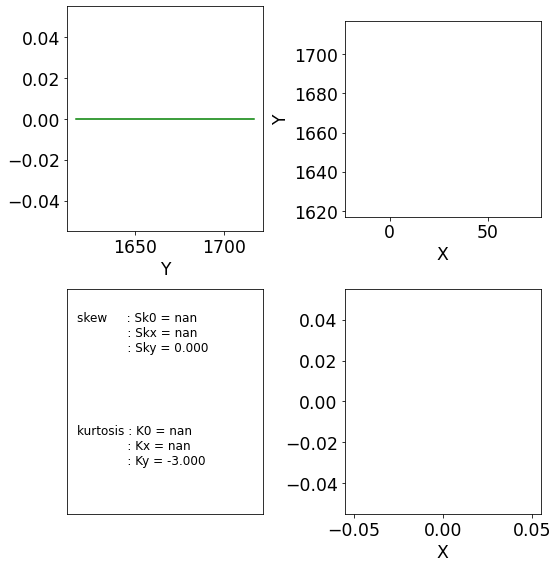

In [722]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(222)
ax.imshow(thumbnail,origin="lower",extent=(int(x1)-50,int(x1)+50,int(y1)-50,int(y1)+50))
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax=fig.add_subplot(221)
ax.plot(yy,thumbnail_y,"g")
ax.set_xlabel("Y")
ax=fig.add_subplot(224)
ax.plot(xx,thumbnail_x,"b")
ax.set_xlabel("X")
plt.tight_layout()
ax=fig.add_subplot(223)
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])
#ax.text(0.05, 0.95, shape_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.text(0.05, 0.9, skew_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.text(0.05, 0.4, kurt_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)

# Go for spectrum reconstruction

2021-04-18 23:58:31  spectractor.extractor.extractor Spectractor          INFO   
	Start SPECTRACTOR


Section: paths
x disperser_dir: extractor/dispersers/	=> parameters.DISPERSER_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/	 <class 'str'>
x throughput_dir: simulation/AuxTelThroughput/	=> parameters.THROUGHPUT_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/simulation/AuxTelThroughput/	 <class 'str'>
Section: instrument
x obs_name: AUXTEL	=> parameters.OBS_NAME: AUXTEL	 <class 'str'>
x obs_altitude: 2.66299616375123	=> parameters.OBS_ALTITUDE: 2.66299616375123	 <class 'float'>
x obs_latitude: -30.2446389756252	=> parameters.OBS_LATITUDE: -30.2446389756252	 <class 'float'>
x obs_diameter: 1.20	=> parameters.OBS_DIAMETER: 1.2 m	 <class 'astropy.units.quantity.Quantity'>
x obs_epoch: J2000.0	=> parameters.OBS_EPOCH: J2000.0	 <class 'str'>
x obs_transmission_systematics: 0.005	=> parameters.OBS_TRANSMISSION_SYSTEMATICS: 0.005	 <class 'float'>
x obs_object_type: STAR	=> paramet

2021-04-18 23:58:31  Image      load_AUXTEL_image    INFO   
	Loading AUXTEL image /Users/dagoret/DATA/AuxTelData2021/ronchi170lpmm/FlipCleans/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_232.fits...
2021-04-18 23:58:31  Image      load_AUXTEL_image    INFO   
	Image loaded
2021-04-18 23:58:32  Image      load_image           INFO   
	Loading disperser ronchi170lpmm...
2021-04-18 23:58:32  Hologram   load_specs           INFO   
	Load disperser ronchi170lpmm:
	from /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/ronchi170lpmm
2021-04-18 23:58:32  Hologram   load_specs           INFO   
	Grating characteristics:
	N = 170.00 +/- 0.10 grooves/mm
	Average tilt of 0.0 degrees
2021-04-18 23:58:36  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.364855849003117 but average of self.read_out_noise is 8.5.
2021-04-18 23:58:36  TelescopeTransmission reset_lambda_rang

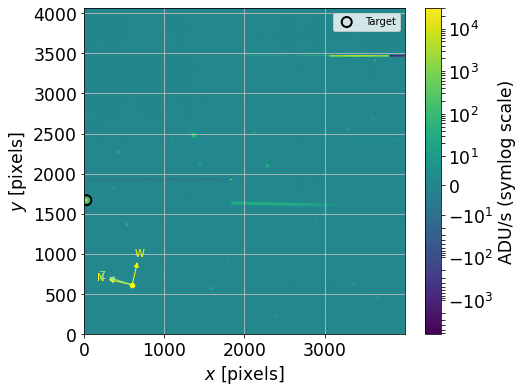

2021-04-18 23:58:42  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the image with guess=[  27.47957183 1667.43403846]...
2021-04-18 23:58:42  spectractor.extractor.images find_target          INFO   
	No WCS /Users/dagoret/DATA/AuxTelData2021/ronchi170lpmm/FlipCleans/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_232_wcs/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_232.wcs available, use 2D fit to find target pixel position.
 [astropy.modeling.fitting]
2021-04-18 23:58:42  astropy    _showwarning         WARNING The fit may be poorly conditioned

2021-04-18 23:58:42  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
    c0_0 c1_0 c0_1
    ---- ---- ----
     nan  nan  nan


ZeroDivisionError: Weights sum to zero, can't be normalized

In [723]:
spectrum = Spectractor(filename, output_directory, guess=[x1,y1], target_label=target, disperser_label=disperser_label, config=config)